In [37]:
import sys
import pickle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import networkx as nx
from stellargraph import StellarGraph
from stellargraph.data import BiasedRandomWalk
from gensim.models import Word2Vec
%matplotlib inline


In [19]:
with open('../data/disease_ontograph.pkl', 'rb') as f:
    disease_ontograph = StellarGraph.from_networkx(pickle.load(f))

In [20]:
disease_ontograph.node_type('GARD:1')

'disease'

In [23]:
diseases = [n for n in disease_ontograph.nodes() if disease_ontograph.node_type(n) ==  'disease']

## Node2Vec example

In [85]:
rw = BiasedRandomWalk(disease_ontograph)
q = 2
walks = rw.run(
    nodes=diseases[0:5],  # root nodes
    length=10,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=1/q,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=q,  # Defines (unormalised) probability, 1/q, for moving away from source node
)
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 50


In [86]:
str_walks = [[str(n) for n in walk] for walk in walks]
model = Word2Vec(str_walks, vector_size=128, window=5, min_count=0, sg=1, workers=5, epochs=1)

In [87]:
str_walks

[['GARD:1',
  'HP:0003542',
  'HP:0500165',
  'HP:0011864',
  'HP:0100529',
  'HP:0011864',
  'HP:0500165',
  'HP:0010876',
  'HP:0410282',
  'HP:0010876'],
 ['GARD:1',
  'HP:0000365',
  'GARD:6457',
  'HP:0001180',
  'GARD:6457',
  'HP:0100585',
  'GARD:11910',
  'HP:0000831',
  'GARD:13015',
  'HP:0000815'],
 ['GARD:1',
  'HP:0001396',
  'GARD:7172',
  'HP:0006579',
  'GARD:9430',
  'HP:0003138',
  'GARD:1903',
  'HP:0003138',
  'GARD:8702',
  'HP:0000007'],
 ['GARD:1',
  'HP:0001994',
  'GARD:3295',
  'HP:0100493',
  'GARD:3295',
  'HP:0000639',
  'GARD:330',
  'HP:0000164',
  'GARD:12562',
  'HP:0004322'],
 ['GARD:1',
  'HP:0003355',
  'GARD:5775',
  'HP:0001373',
  'GARD:12405',
  'HP:0002020',
  'GARD:3295',
  'HP:0002757',
  'GARD:4157',
  'HP:0006335'],
 ['GARD:1',
  'HP:0001397',
  'GARD:9870',
  'HP:0001987',
  'HP:0001948',
  'HP:0500227',
  'HP:0500187',
  'HP:0500227',
  'HP:0500187',
  'HP:0001941'],
 ['GARD:1',
  '617.0',
  'GARD:1',
  'HP:0000365',
  'GARD:9971',
  'HP:

In [44]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index_to_key  # list of node IDs
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
#node_targets = node_subjects.loc[[int(node_id) for node_id in node_ids]]

In [47]:
transform = TSNE

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

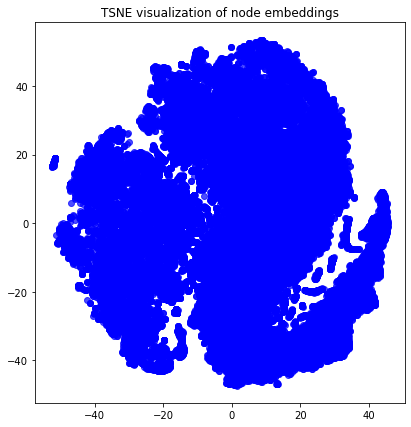

In [48]:
# draw the embedding points, coloring them by the target label (paper subject)
alpha = 0.7
#label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
#node_colours = [label_map[target] for target in node_targets]

plt.figure(figsize=(7, 7))
plt.axes().set(aspect="equal")
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c='blue',
    cmap="jet",
    alpha=alpha,
)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()